# Regressão Linear Aplicada a previsão do impacto do despacho de usina Termoelétrica sob Custo Marginal De Operação

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr, spearmanr

## Recebendo o arquivo no modelo .csv

In [2]:
dataset = pd.read_csv('Simples_Geração_de_Energia_Barra_Semana_data.csv', sep= ';', header = None)


### Visualizando os dados do dataframe:

In [3]:
dataset.head()

,0,1,2
0,02/01/2016,"937,67","27,8"
1,09/01/2016,"1009,05","20,64"
2,16/01/2016,"840,08","12,6"
3,23/01/2016,"839,19","9,66"
4,30/01/2016,"764,1","6,07"


### Visualizando a informação do dataframe: 

In [4]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       269 non-null    object
 1   1       269 non-null    object
 2   2       269 non-null    object
dtypes: object(3)
memory usage: 6.4+ KB


### Inserindo os nomes das colunas

In [5]:
dataset.columns = ["Semana Operativa", "Ger_Term", "cmo"]

In [6]:
dataset.head()

,Semana Operativa,Ger_Term,cmo
0,02/01/2016,"937,67","27,8"
1,09/01/2016,"1009,05","20,64"
2,16/01/2016,"840,08","12,6"
3,23/01/2016,"839,19","9,66"
4,30/01/2016,"764,1","6,07"


### Tratando os dados / Formatando

In [7]:
dataset['Ger_Term'] = dataset['Ger_Term'].str.replace(',', '.').astype(float)


In [8]:
dataset['cmo'] = dataset['cmo'].str.replace(',', '.').astype(float)

In [9]:
dataset.head()

,Semana Operativa,Ger_Term,cmo
0,02/01/2016,937.67,27.80
1,09/01/2016,1009.05,20.64
2,16/01/2016,840.08,12.60
3,23/01/2016,839.19,9.66
4,30/01/2016,764.10,6.07


## Medindo a correlação entre as váriaveis


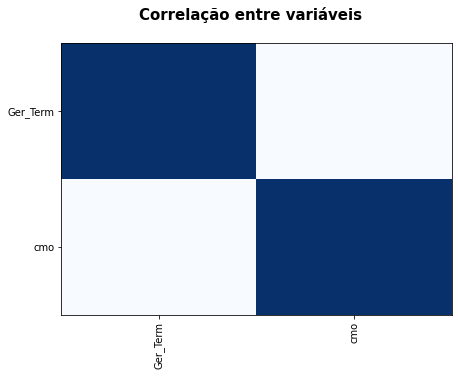

In [10]:
corr = dataset.corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap= 'Blues', interpolation='none', aspect= 'auto')
plt.colorbar
plt.xticks(range(len(corr)), corr.columns, rotation= 'vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre variáveis', fontsize = 15, fontweight = 'bold')
plt.grid(False)
plt.show()

### Na tabela acima pode-se inferir que a correlação entre as variáveis, em todo o dataset, é muito fraca.

## A seguir mostraremos ao autocorrelação das variáveis do dataset
### Definiu-se um lag de 60 semanas operativas

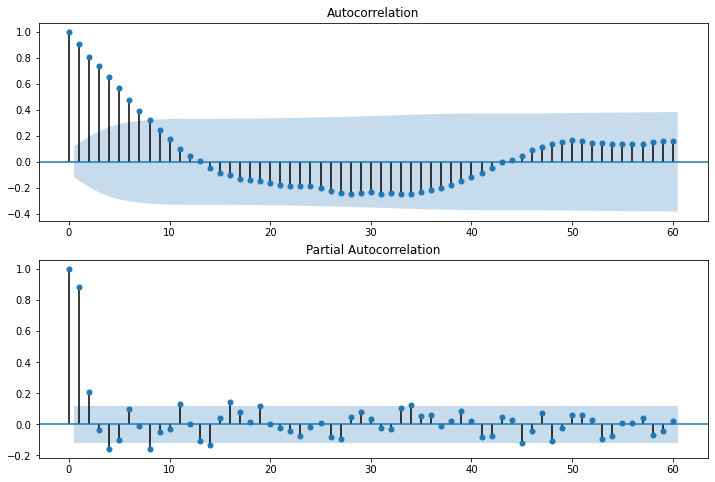

In [68]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['Ger_Term'].values.squeeze(), lags=60, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dataset[ 'cmo'].values, lags=60, ax=ax2)

### Note que há uma forte correlação entre os dados nas semanas iniciais.

### Correlação de Spearman 

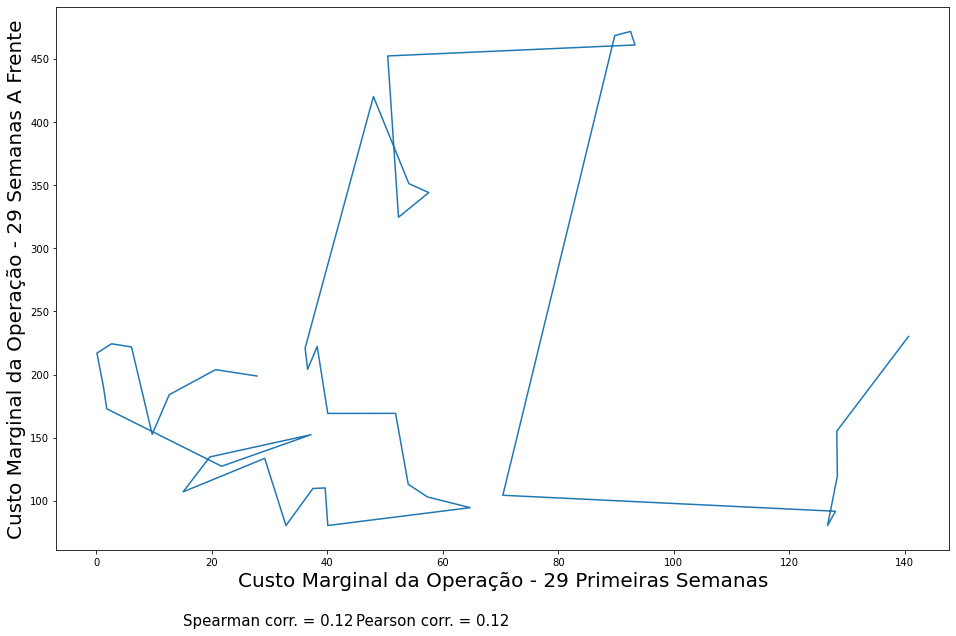

In [105]:
plt.figure(figsize = (16,10))
plt.plot(dataset['cmo'][0:40], dataset['cmo'][40:80])
plt.xlabel("Custo Marginal da Operação - 29 Primeiras Semanas", fontsize = 20)
plt.ylabel("Custo Marginal da Operação - 29 Semanas A Frente", fontsize = 20)
corr, p_value = pearsonr(dataset['cmo'][0:40].values, dataset['cmo'][40:80].values)
corrs, p_values = spearmanr(dataset['cmo'][0:40].values, dataset['cmo'][40:80].values)
corr = int(corr*100)/100
corrs = int(corr*100)/100

string = 'Pearson corr. = ' +str(corr)
plt.text(45,1, string, fontsize= 15)

string = 'Spearman corr. = ' +str(corrs)
plt.text(15,1, string, fontsize= 15)
plt.show()

### Separando as variáveis  

In [11]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2:3].values

### Criando a função de erro:

In [12]:
def rmse(ytrue,ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

### Criando o modelo preditivo

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

### Plotando os valores de Y_pred - Y_test

In [15]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[464.44 368.03]
 [ 76.83 186.86]
 [238.86 468.54]
 [162.51  69.7 ]
 [ 80.17   0.  ]
 [ 53.55 157.33]
 [208.22 172.23]
 [147.76 122.4 ]
 [154.92  37.5 ]
 [155.25   1.79]
 [263.08 763.77]
 [481.35 630.47]
 [ 47.29 172.05]
 [388.72 262.72]
 [199.01 267.3 ]
 [123.67  91.42]
 [135.92 226.76]
 [170.39 184.3 ]
 [547.69 599.9 ]
 [217.39 204.12]
 [144.32   0.  ]
 [284.64 603.83]
 [ 95.14 109.76]
 [156.66 103.09]
 [326.68 220.24]
 [181.18  80.38]
 [105.22   0.  ]
 [129.45 104.4 ]
 [176.72 215.25]
 [ 68.85   0.  ]
 [258.27   1.19]
 [ 70.76 140.97]
 [400.7  229.61]
 [119.69 199.26]
 [390.19 224.4 ]
 [ 36.43  96.9 ]
 [486.27 514.12]
 [316.55 273.61]
 [121.84  54.12]
 [165.96 150.57]
 [358.47 309.28]
 [ 89.12 145.56]
 [298.01 128.35]
 [140.01 258.44]
 [308.42 287.31]
 [168.97  54.01]
 [320.2  262.04]
 [ -3.26 139.45]
 [294.26 238.27]
 [ 61.82  81.73]
 [254.1  323.41]
 [279.57   2.62]
 [265.2   40.07]
 [330.55 361.74]]


In [16]:
y_pred = y_pred.reshape(len(y_pred),)
y_pred.shape

(54,)

## Estabelecendo as métricas para encontrar os erros

### Calculando o erro quadrático médio RMSE: 

In [17]:
p = y_pred
error = rmse(y_test, p) 
print('Mean Error = % .5f' % np.mean(error))


Mean Error =  135.64589


### MAE - MEAN ABSOLUTE ERROR - ERRO MÉDIO ABSOLUTO 
#### minimizador = mediana / menos preocupado com outliers

In [18]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, p)
print('Mean Error = % .5f' % np.mean(mae))

Mean Error =  102.96821


### Analisando o gráfico do comportamento do CMO com o despacho de termoelétricas 

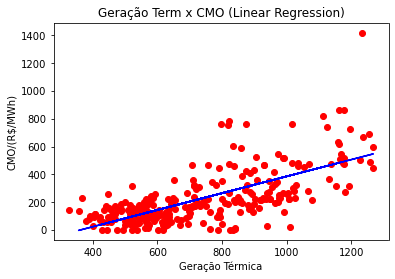

In [19]:
plt.scatter(X, y, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('Geração Term x CMO (Linear Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

In [20]:
regressor.predict([[707]])

array([[208.85]])

#### O valor do cmo correpondente a semana operativa em questão corresponde a 175,74 reais

# Modelo de Regressão Não-Linear 
## Treinando o modelo de Regressão Polinomial em Todo o Dataset

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) 

LinearRegression()

In [22]:

y_pred_poly = lin_reg_2.predict( poly_reg.fit_transform(X))


In [23]:
p_poly = y_pred_poly

error = rmse(y, p_poly) 
print('Mean Error = % .5f' % np.mean(error))

Mean Error =  142.18803


In [24]:
from sklearn.metrics import mean_absolute_error
mae_poly = mean_absolute_error(y, p_poly)
print('Mean Error = % .5f' % np.mean(mae_poly))

Mean Error =  99.79470


In [25]:
lin_reg_2.predict(poly_reg.fit_transform([[707]]))

array([[185.3]])

#### O valor do cmo correpondente a semana operativa em questão corresponde a 175,74 reais

## Visualizando os Resultados da Regressão Polinomial

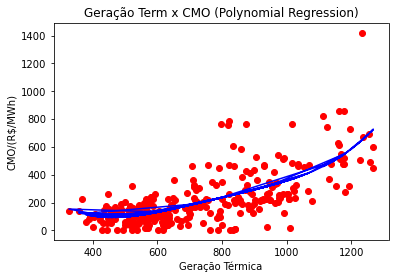

In [26]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Geração Term x CMO (Polynomial Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

## Visualizando os resultados da Regressão Polinomial ( para maior resolução e smooth da curva


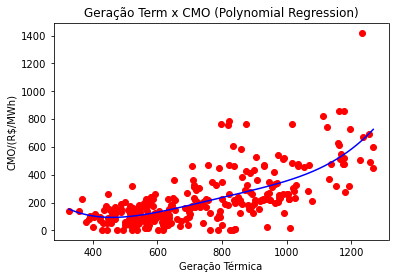

In [27]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Geração Term x CMO (Polynomial Regression)')
plt.xlabel('Geração Térmica')
plt.ylabel('CMO/(R$/MWh)')
plt.show()

# Adicionando nova váriaveis
### Realizando a regressão linear para o incremento ou decremento de geração térmica

In [28]:
melt = dataset.copy()
melt['Ger_Term_sem-1'] = dataset['Ger_Term'].shift()
melt['Diff_Ger_Term'] = dataset['Ger_Term'].diff()
melt = melt.dropna()
melt.head()

,Semana Operativa,Ger_Term,cmo,Ger_Term_sem-1,Diff_Ger_Term
1,09/01/2016,1009.05,20.64,937.67,71.38
2,16/01/2016,840.08,12.60,1009.05,-168.97
3,23/01/2016,839.19,9.66,840.08,-0.89
4,30/01/2016,764.10,6.07,839.19,-75.09
5,06/02/2016,824.12,2.62,764.10,60.02


## Medindo a correlação entre as váriaveis com diferentes features

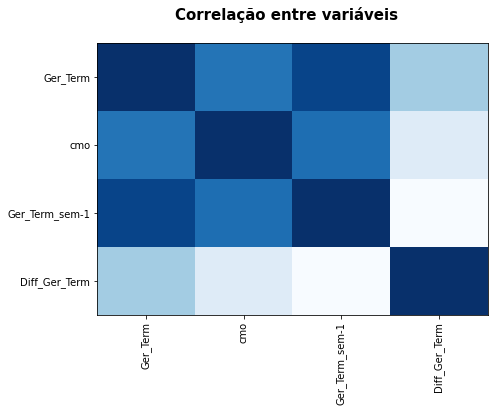

In [29]:
corr = melt.corr()
plt.figure(figsize=(7,5))
plt.imshow(corr, cmap= 'Blues', interpolation='none', aspect= 'auto')
plt.colorbar
plt.xticks(range(len(corr)), corr.columns, rotation= 'vertical')
plt.yticks(range(len(corr)), corr.columns);
plt.suptitle('Correlação entre variáveis', fontsize = 15, fontweight = 'bold')
plt.grid(False)
plt.show()

In [30]:
melt.reset_index(inplace = True)
melt.set_index('index')
melt.head()

,index,Semana Operativa,Ger_Term,cmo,Ger_Term_sem-1,Diff_Ger_Term
0,1,09/01/2016,1009.05,20.64,937.67,71.38
1,2,16/01/2016,840.08,12.60,1009.05,-168.97
2,3,23/01/2016,839.19,9.66,840.08,-0.89
3,4,30/01/2016,764.10,6.07,839.19,-75.09
4,5,06/02/2016,824.12,2.62,764.10,60.02


In [31]:
import numpy as np
for index, row in melt.iterrows():
    
     if index > 1:
        if pd.isnull(row['Diff_Ger_Term']):
            melt.loc[index, 'Diff_Ger_Term'] = (melt.loc[index-1,'Diff_Ger_Term']+melt.loc[index-2,  'Diff_Ger_Term'])/2
        else:

             if pd.isnull(row['Diff_Ger_Term']):
                melt.loc[index, 'Diff_Ger_Term'] = (melt.loc[index+2,'Diff_Ger_Term']+melt.loc[index+1,  'Diff_Ger_Term'])/2    

In [32]:
a = melt.iloc[:, 4:5].values
b = melt.iloc[:, 2:3].values

In [33]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_1, y_train_1)

LinearRegression()

In [35]:
y_pred_1 = regressor.predict(X_test_1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[464.44 368.03]
 [ 76.83 186.86]
 [238.86 468.54]
 [162.51  69.7 ]
 [ 80.17   0.  ]
 [ 53.55 157.33]
 [208.22 172.23]
 [147.76 122.4 ]
 [154.92  37.5 ]
 [155.25   1.79]
 [263.08 763.77]
 [481.35 630.47]
 [ 47.29 172.05]
 [388.72 262.72]
 [199.01 267.3 ]
 [123.67  91.42]
 [135.92 226.76]
 [170.39 184.3 ]
 [547.69 599.9 ]
 [217.39 204.12]
 [144.32   0.  ]
 [284.64 603.83]
 [ 95.14 109.76]
 [156.66 103.09]
 [326.68 220.24]
 [181.18  80.38]
 [105.22   0.  ]
 [129.45 104.4 ]
 [176.72 215.25]
 [ 68.85   0.  ]
 [258.27   1.19]
 [ 70.76 140.97]
 [400.7  229.61]
 [119.69 199.26]
 [390.19 224.4 ]
 [ 36.43  96.9 ]
 [486.27 514.12]
 [316.55 273.61]
 [121.84  54.12]
 [165.96 150.57]
 [358.47 309.28]
 [ 89.12 145.56]
 [298.01 128.35]
 [140.01 258.44]
 [308.42 287.31]
 [168.97  54.01]
 [320.2  262.04]
 [ -3.26 139.45]
 [294.26 238.27]
 [ 61.82  81.73]
 [254.1  323.41]
 [279.57   2.62]
 [265.2   40.07]
 [330.55 361.74]]


In [36]:
y_pred_1 = y_pred_1.reshape(len(y_pred_1),1)

In [37]:
p_1 = y_pred_1
error = rmse(y_test_1, p_1) 
print('Mean Error = % .5f' % np.mean(error))

Mean Error =  97.50771


In [38]:
erro = (np.abs((y_test_1 - p_1)/p_1))
print('Mean Error = % .5f' % np.mean(erro))

Mean Error =  0.10761


## Modelos de Regressão / Multiplas Variáveis

## Os modelos a seguir tentam prever o Custo Marginal da Operação (CMO) a partir dos dados de geração termoelétrica da região sudeste/ Centro - Oeste e da diferença entre esses dados (incremento ou decremento da geração)

### Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
mean_error = []
for i in range(240,269):
    train = melt[melt['index'].values <= i]
    val = melt[melt['index'].values >= i]
    
    xtr, xts = train.drop(['Semana Operativa', 'cmo'], axis=1), val.drop(['Semana Operativa', 'cmo'], axis=1)
    ytr, yts = train['cmo'].values, val['cmo'].values
    
    mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    sem = melt[melt['index'] >= i]['Semana Operativa'].values
    error = rmse(yts, p)
    #print('semana %d - Error %.5f' % (index, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


Mean Error = 90.85494


In [106]:
sem = melt['Semana Operativa'][0:29].values
mean_error = np.array(mean_error)
mean_error.shape
data = np.concatenate((sem.reshape(len(sem),1), mean_error.reshape(len(mean_error),1)),1)
data.shape

(29, 2)

In [107]:
data = pd.DataFrame(np.array(data).reshape(29,2),columns =["Semana","Erro"])
data.head()

,Semana,Erro
0,09/01/2016,111.932
1,16/01/2016,112.706
2,23/01/2016,112.138
3,30/01/2016,114.674
4,06/02/2016,116.452


<Figure size 1080x864 with 0 Axes>

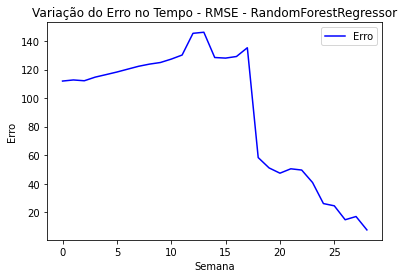

In [108]:
plt.figure(figsize = (15,12))
data.plot(title = 'Variação do Erro no Tempo - RMSE - RandomForestRegressor', color = 'blue')
plt.ylabel('Erro')
plt.xlabel('Semana')
plt.show()

### Regressão Linear Múltipla

In [110]:
mean_error = []
for index in range(240,269):
    train = melt[melt['index'] < index]
    val = melt[melt['index'] >= index]
    
    xtr, xts = train.drop(['Semana Operativa', 'cmo'], axis=1), val.drop(['Semana Operativa', 'cmo'], axis=1)
    ytr, yts = train['cmo'].values, val['cmo'].values
    
    mdl = LinearRegression()
    
    mdl.fit(xtr, np.log1p(ytr))
    
    p = np.expm1(mdl.predict(xts))
    
    error = rmse(yts, p)
    print('semana %d - Error %.5f' % (index, error))
    mean_error.append(error)
print('Mean Error = %.5f' % np.mean(mean_error))


semana 240 - Error 327.56735
semana 241 - Error 330.51090
semana 242 - Error 334.47270
semana 243 - Error 339.29903
semana 244 - Error 343.74258
semana 245 - Error 349.02054
semana 246 - Error 353.89022
semana 247 - Error 393.89830
semana 248 - Error 518.54929
semana 249 - Error 377.70094
semana 250 - Error 372.01698
semana 251 - Error 398.48279
semana 252 - Error 347.10732
semana 253 - Error 286.73089
semana 254 - Error 244.48942
semana 255 - Error 250.02926
semana 256 - Error 224.50615
semana 257 - Error 213.99022
semana 258 - Error 219.92911
semana 259 - Error 149.48425
semana 260 - Error 111.97206
semana 261 - Error 91.81689
semana 262 - Error 80.41859
semana 263 - Error 61.87239
semana 264 - Error 39.24848
semana 265 - Error 15.26660
semana 266 - Error 16.37361
semana 267 - Error 16.77404
semana 268 - Error 152.88031
Mean Error = 240.07039
